## PROJECTE PSD

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

In [25]:
def read(s: str) -> pd.DataFrame:
    df = pd.read_csv(s)
    df = df.replace(',','.', regex=True)
    df = df.astype(float)
    return df

In [26]:
bt = read('RESULTS-bt.csv')
sp = read('RESULTS-sp.csv')
lu = read('RESULTS-lu.csv') 

### TEMPS VS CORES

In [27]:
def plot(df, type: str): 
    df = df.drop(df.index[0])
    if type != 'lu':
        fig = px.line(df, x="ntasks", y="avg-time", color='Nodes')
        fig.update_layout(xaxis_title="Number of tasks", yaxis_title="Average time")
        fig.update_layout(title_font_size=25)
        fig.show()
 
    df = df.pivot("ntasks", "Nodes", "avg-time")
    ax = sns.heatmap(df, annot=True, fmt=".2f", linewidths=.5)
    plt.savefig('figures/heatmap-'+type+'.png')
    plt.show() 
    

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/388013733.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



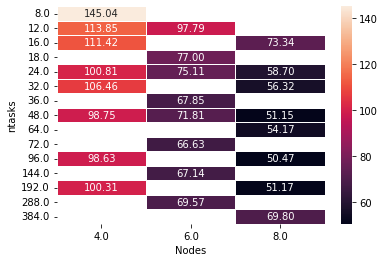

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/388013733.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



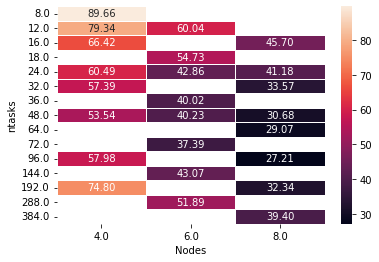

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/388013733.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



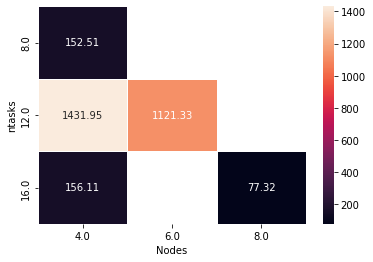

In [28]:
plot(bt, 'bt')
plot(sp, 'sp')
plot(lu, 'lu')

### SPEED-UP VS CORES

In [29]:
def speedup(df, type: str): 
    df = df.drop(df.index[0])
    if type != 'lu':
        fig = px.line(df, x="ntasks", y="speedup", color='Nodes')
        fig.update_layout(xaxis_title="Number of tasks", yaxis_title="Speedup")
        fig.update_layout(title_font_size=20)
        fig.show()
 
    df = df.pivot("ntasks", "Nodes", "speedup")
    ax = sns.heatmap(df, annot=True, fmt=".2f", linewidths=.5)
    plt.savefig('figures/speedheatmap-'+type+'.png')
    plt.show() 

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/1655791362.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



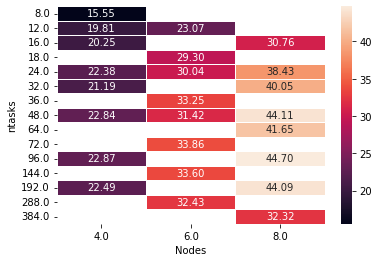

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/1655791362.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



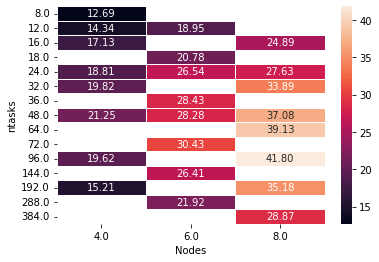

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/1655791362.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



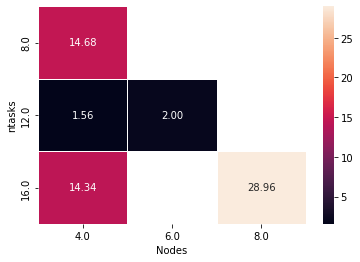

In [30]:
speedup(bt, 'bt')
speedup(sp, 'sp')
speedup(lu, 'lu')

### EFICIÈNCIA VS CORES

In [31]:
def eff(df, type: str): 
    df = df.drop(df.index[0])
    if type != 'lu':
        fig = px.line(df, x="ntasks", y="efficiency", color='Nodes')
        fig.update_layout(xaxis_title="Number of tasks", yaxis_title="Efficiency")
        fig.update_layout(title_font_size=20)
        fig.show()
 
    df = df.pivot("ntasks", "Nodes", "efficiency")
    ax = sns.heatmap(df, annot=True, fmt=".2f", linewidths=.5)
    plt.savefig('figures/effheatmap-'+type+'.png')
    plt.show() 

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/1276107940.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



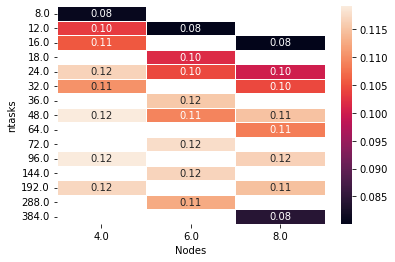

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/1276107940.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



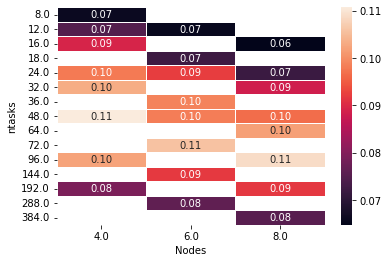

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/1276107940.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



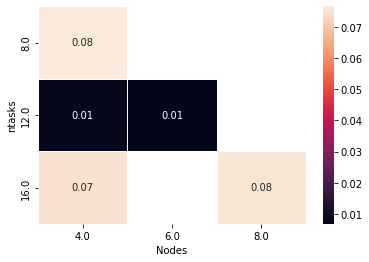

In [32]:
eff(bt, 'bt')
eff(sp, 'sp') 
eff(lu, 'lu')

### Analysis of the Consumed Energy

In [33]:
def clean(s: str) -> pd.DataFrame:
    df = pd.read_csv(s, sep='|')
    df.replace(',','.', regex=True)
    df.drop(df.index[0:3], inplace=True)
    df.drop(['Unnamed: 8', 'JobID'], axis = 1, inplace=True)
    
    for i in range(3, len(df)+3):
        s = df['Elapsed'][i][3:]
        df['Elapsed'][i] = float(s[0:2])*60 + float(s[3:])
        df['ConsumedEnergy'][i] = float(df['ConsumedEnergy'][i][:-1])*1000
        df['AveCPUFreq'][i] = float(df['AveCPUFreq'][i][:-1])*1000
        df['JobName'][i] = df['JobName'][i][8:]
        
    df['AvgPower'] = df['ConsumedEnergy']/df['Elapsed']
    df['cost'] = df['AvgPower']*0.001*df['Elapsed']/3600*0.2
    
    df['cost'] = df['cost'].astype(float)
    df['AvgPower'] = df['AvgPower'].astype(float)
    df['Elapsed'] = df['Elapsed'].astype(float)
    df['ConsumedEnergy'] = df['ConsumedEnergy'].astype(float)
    df['AveCPUFreq'] = df['AveCPUFreq'].astype(float)
    df['JobName'] = df['JobName'].astype(int)
    
    return df


def read2(s: str) -> pd.DataFrame:
    
    df1 = clean(s+'1.csv')
    df2 = clean(s+'2.csv')
    df3 = clean(s+'3.csv')
      
    dfavg = pd.DataFrame()
    dfavg['AllocCPUS'] = df1['AllocCPUS']
    dfavg['reqCPUS'] =   df1['ReqCPUS']
    dfavg['JobName'] =   df1['JobName']
    dfavg['TotalCPU'] =  df1['TotalCPU']
    
    dfavg['ConsumedEnergy'] = (df1['ConsumedEnergy'] + df2['ConsumedEnergy'] + df3['ConsumedEnergy'])/3
    dfavg['Elapsed'] =        (df1['Elapsed'] +        df2['Elapsed'] +        df3['Elapsed'])       /3
    dfavg['AvgPower'] =       (df1['AvgPower'] +       df2['AvgPower'] +       df3['AvgPower'])      /3
    dfavg['cost'] =           (df1['cost'] +           df2['cost'] +           df3['cost'])          /3
    dfavg['AveCPUFreq'] =     (df1['AveCPUFreq'] +     df2['AveCPUFreq'] +     df3['AveCPUFreq'])    /3
    
    return dfavg

In [34]:
bte = read2('info_bt')
spe = read2('info_sp')
lue = read2('info_lu')

dfs = [bte, spe, lue]

pd.options.mode.chained_assignment = None

In [35]:
bte.head()

,AllocCPUS,reqCPUS,JobName,TotalCPU,ConsumedEnergy,Elapsed,AvgPower,cost,AveCPUFreq
3,192,192,8,07:47:55,175400.000000,152.333333,1152.225953,0.009744,1.915667e+06
4,192,192,12,06:08:38,146500.000000,116.333333,1259.312539,0.008139,4.414333e+06
5,192,192,16,05:57:53,142440.000000,114.333333,1245.797356,0.007913,5.028000e+06
6,192,192,24,05:22:00,133036.666667,103.666667,1283.567568,0.007391,1.470400e+07
7,192,192,32,05:42:15,139660.000000,108.666667,1285.207632,0.007759,2.586067e+07


In [36]:
def scatter_plot(df, x: str, y: str, size: str, color: str, text: str):
    fig = px.scatter(df, x=x, y=y,  size = size, color = color, text=text)
    fig.show()

def line_plot(df, x: str, y: str, color: str, text: str = None, log_x: bool=False):
    if text is None:
        fig = px.line(df, x=x, y=y, color = color, log_x=log_x)
    else: 
        fig = px.line(df, x=x, y=y, color = color, text=text, log_x=log_x)
    fig.show()

In [37]:
# get a subset of bte, ste, and lue with only the columns AllocCPUS
  
def get_table(df): 
  df = df[['AllocCPUS', 'JobName', 'ConsumedEnergy', 'Elapsed', 'AvgPower', 'cost']]
  

In [38]:
  
def heat(df, a: str): 
  df = df.pivot("JobName", "AllocCPUS", "ConsumedEnergy")
  ax = sns.heatmap(df, annot=True, fmt=".2f", linewidths=.5)
  plt.savefig('figures/haha'+ a + '.png')
  plt.show() 

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/3964019934.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



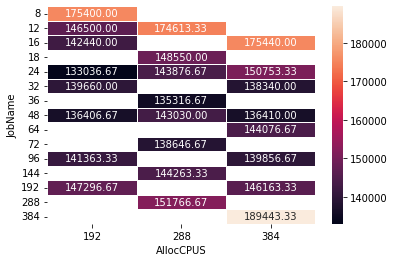

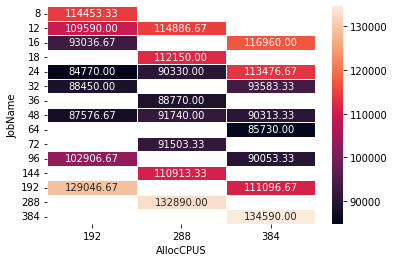

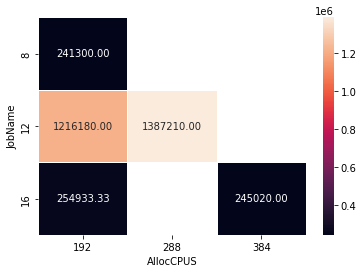

In [39]:
heat(bte, 'bt')
heat(spe, 'sp')
heat(lue, 'lu')


In [40]:
for df in dfs:
    scatter_plot(df, 'Elapsed', 'AvgPower', 'cost', 'AllocCPUS', 'JobName')


In [41]:
  
def heatmap(df): 
  df = df.pivot("", "Nodes", "avg-time")
  ax = sns.heatmap(df, annot=True, fmt=".2f", linewidths=.5)
  plt.savefig('figures/heatmap-'+type+'.png')
  plt.show() 

Observem que els de 4 nodes tenen una potencia mitjana més petita i tarden més (ja ho hem vist abans). Observem que com menys temps, més gran es la potència mitjana consumida. 

In [42]:
for df in dfs:
    scatter_plot(df,"ConsumedEnergy","cost", "Elapsed","AllocCPUS",'JobName')


In [43]:
for df in dfs:
    scatter_plot(df,"Elapsed","cost", "cost","AllocCPUS",'JobName')

In [44]:
for df in dfs:
    scatter_plot(df,"JobName","ConsumedEnergy", "AllocCPUS", "AllocCPUS", "JobName")

## PART 3

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/2534122003.py:14: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/2534122003.py:17: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



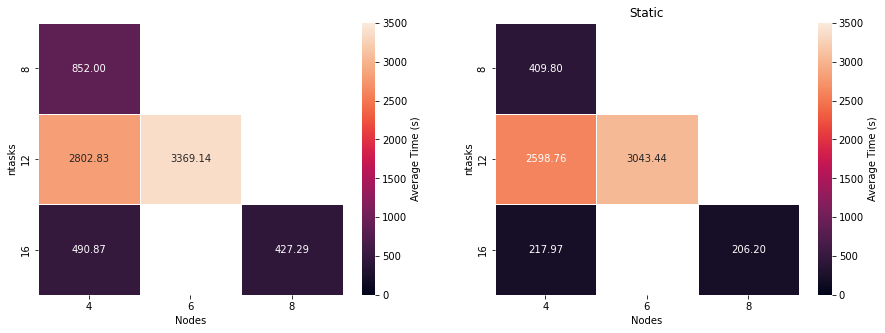

In [148]:
df_DYNAMIC = pd.read_csv('RESULTS-lu_runtime_DYNAMIC.csv')
df_DYNAMIC = df_DYNAMIC.drop([0])
df_STATIC = pd.read_csv('RESULTS-lu_runtime_STATIC.csv')
df_STATIC = df_STATIC.drop([0])
#add a column to df_DYNAMIC to indicate that it is dynamic
df_DYNAMIC['schedule'] = 'dynamic'
#add a column to df_STATIC to indicate that it is static
df_STATIC['schedule'] = 'static'

#add df_STATIC to df_DYNAMIC using pandas.concat
df = pd.concat([df_DYNAMIC, df_STATIC], axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
df_STATIC_elapsed = df_STATIC.pivot("ntasks", "Nodes", "avg-time")
sns.heatmap(df_STATIC_elapsed, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Time (s)'}, vmin=0, vmax=3500, ax = ax2)
ax2.set_title("Static")
df_DYNAMIC_elapsed = df_DYNAMIC.pivot("ntasks", "Nodes", "avg-time")
sns.heatmap(df_DYNAMIC_elapsed, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Time (s)'}, vmin=0, vmax=3500, ax = ax1)
ax2.set_title("Static")
plt.savefig('figures/heatmap-runtime.png')
plt.show()

SPEEDUP

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/717173140.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/717173140.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



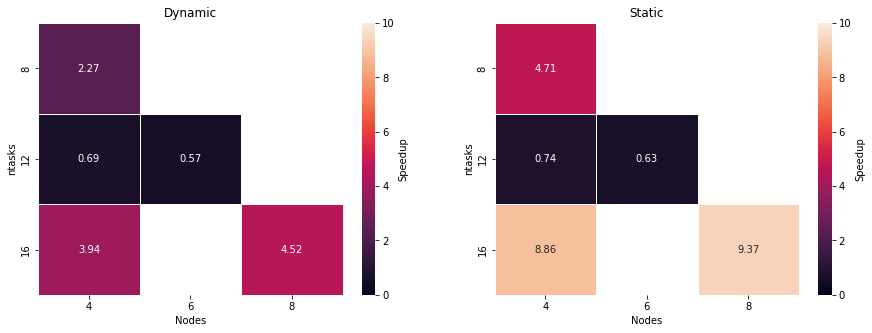

In [141]:
df_STATIC_speedup = df_STATIC.pivot("ntasks", "Nodes", "speedup")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(df_STATIC_speedup, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Speedup'}, vmin=0, vmax=10, ax = ax2)
ax2.set_title("Static")
df_DYNAMIC_speedup = df_DYNAMIC.pivot("ntasks", "Nodes", "speedup")
sns.heatmap(df_DYNAMIC_speedup, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Speedup'}, vmin=0, vmax=10, ax = ax1)
ax1.set_title("Dynamic")
plt.savefig('figures/heatmap-runtime_speedup.png')
plt.show()

EFFICIENCY

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/4127919887.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/var/folders/jj/05bjg6kd3g3_3ydy38zpjf_m0000gn/T/ipykernel_7761/4127919887.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



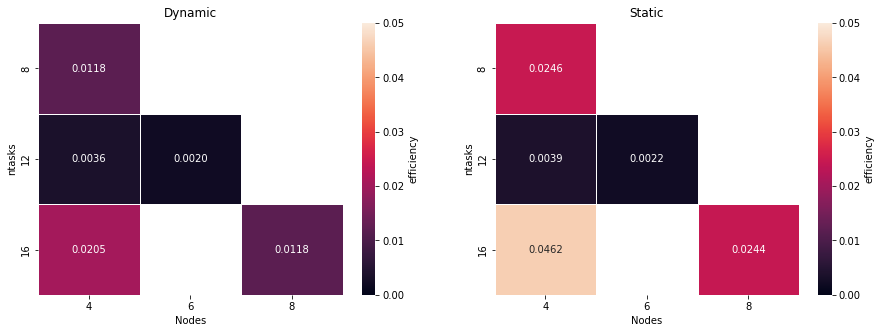

In [142]:
df_STATIC_efficiency = df_STATIC.pivot("ntasks", "Nodes", "efficiency")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(df_STATIC_efficiency, annot=True, fmt=".4f", linewidths=.5, cbar_kws={'label': 'efficiency'}, vmin=0, vmax=0.05, ax = ax2)
ax2.set_title("Static")
df_DYNAMIC_efficiency = df_DYNAMIC.pivot("ntasks", "Nodes", "efficiency")
sns.heatmap(df_DYNAMIC_efficiency, annot=True, fmt=".4f", linewidths=.5, cbar_kws={'label': 'efficiency'}, vmin=0, vmax=0.05, ax = ax1)
ax1.set_title("Dynamic")
plt.savefig('figures/heatmap-runtime_efficiency.png')
plt.show()